In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# initial sample data
data = {
    'CustomerId': [1001,1002,1003,1004,1005],
    'Age': [33,28,42,51,37],
    'Gender': ['Male','Female','Male','Female','Male'],
    'MaritalStatus': ['Married','Single','Single','Married','Divorced'],
    'AnnualIncome (USD)': [65000, 45000, 55000, 80000, 58000],
    'TotalPurchases': [18,15,20,12,10],
    'PreferredCategory': ['Electronics','Appliances','Electronics','Electronics','Appliances']
}

# convert it to dataframe
df = pd.DataFrame(data)

In [3]:
# Generate additional rows. dataset should have 500 rows

additional_rows = 500 - len(df)
new_rows = []
# Create a random row for each of the new rows we want to add, and append it into our list called 'new_rows'

for i in range(additional_rows):
    new_id = max(df['CustomerId']) + i + 1
    age = np.random.randint(20, 70)
    gender = np.random.choice(['Male', 'Female'])
    marital_status = np.random.choice(['Married', 'Single', 'Divorced'])
    income = np.random.randint(40000, 100000)
    purchases = np.random.randint(10, 30)
    category = np.random.choice(['Electronics', 'Appliances'])

    new_row = {
        'CustomerId': new_id,
        'Age': age,
        'Gender': gender,
        'MaritalStatus': marital_status,
        'AnnualIncome (USD)': income,
        'TotalPurchases': purchases,
        'PreferredCategory': category
    }
    new_rows.append(new_row)

# Create a new DataFrame by concatenating the original DataFrame and the new rows
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
df.tail()   



,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
495,1496,22,Female,Divorced,88593,19,Appliances
496,1497,68,Male,Married,65872,14,Appliances
497,1498,23,Male,Single,68107,16,Appliances
498,1499,60,Female,Married,57205,25,Electronics
499,1500,22,Male,Divorced,77401,20,Electronics


In [4]:
# add missing values
df.loc[75, 'Age'] = np.nan
df.loc[150, 'Gender'] = np.nan
df.loc[300, 'MaritalStatus'] = np.nan

In [5]:
df.to_csv("TechElectro_Customer_Data.csv", index=False)

In [6]:
# load data
df = pd.read_csv('TechElectro_Customer_Data.csv')
df.tail()

,CustomerId,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
495,1496,22.0,Female,Divorced,88593,19,Appliances
496,1497,68.0,Male,Married,65872,14,Appliances
497,1498,23.0,Male,Single,68107,16,Appliances
498,1499,60.0,Female,Married,57205,25,Electronics
499,1500,22.0,Male,Divorced,77401,20,Electronics


In [7]:
df.shape

(500, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          500 non-null    int64  
 1   Age                 499 non-null    float64
 2   Gender              499 non-null    object 
 3   MaritalStatus       499 non-null    object 
 4   AnnualIncome (USD)  500 non-null    int64  
 5   TotalPurchases      500 non-null    int64  
 6   PreferredCategory   500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [9]:
df.isna().sum()

CustomerId            0
Age                   1
Gender                1
MaritalStatus         1
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64

In [10]:
# fill missing data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0], inplace=True)

In [11]:
df.describe()

,CustomerId,Age,AnnualIncome (USD),TotalPurchases
count,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,44.782000,68885.108000,19.382000
std,144.481833,15.018975,16596.735549,5.638765
min,1001.000000,20.000000,40078.000000,10.000000
25%,1125.750000,32.000000,54945.250000,15.000000
50%,1250.500000,45.000000,67328.000000,19.000000
75%,1375.250000,58.000000,82670.750000,24.000000
max,1500.000000,69.000000,99876.000000,29.000000


In [12]:
df.value_counts('Gender')

Gender
Female    258
Male      242
Name: count, dtype: int64

In [13]:
df.value_counts('MaritalStatus')

MaritalStatus
Single      186
Married     165
Divorced    149
Name: count, dtype: int64

In [14]:
df.value_counts('PreferredCategory')

PreferredCategory
Appliances     266
Electronics    234
Name: count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          500 non-null    int64  
 1   Age                 500 non-null    float64
 2   Gender              500 non-null    object 
 3   MaritalStatus       500 non-null    object 
 4   AnnualIncome (USD)  500 non-null    int64  
 5   TotalPurchases      500 non-null    int64  
 6   PreferredCategory   500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [16]:
# perform one hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender','MaritalStatus','PreferredCategory'], dtype=int)
df_encoded.head()

,CustomerId,Age,AnnualIncome (USD),TotalPurchases,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferredCategory_Appliances,PreferredCategory_Electronics
0,1001,33.0,65000,18,0,1,0,1,0,0,1
1,1002,28.0,45000,15,1,0,0,0,1,1,0
2,1003,42.0,55000,20,0,1,0,0,1,0,1
3,1004,51.0,80000,12,1,0,0,1,0,0,1
4,1005,37.0,58000,10,0,1,1,0,0,1,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['AnnualIncome (USD)','TotalPurchases']
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded.head()

,CustomerId,Age,AnnualIncome (USD),TotalPurchases,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferredCategory_Appliances,PreferredCategory_Electronics
0,1001,33.0,0.416770,0.421053,0,1,0,1,0,0,1
1,1002,28.0,0.082310,0.263158,1,0,0,0,1,1,0
2,1003,42.0,0.249540,0.526316,0,1,0,0,1,0,1
3,1004,51.0,0.667614,0.105263,1,0,0,1,0,0,1
4,1005,37.0,0.299709,0.000000,0,1,1,0,0,1,0


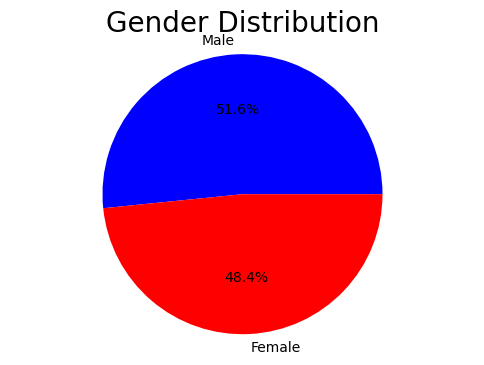

In [18]:
plt.figure(figsize=(6, 4))
X=df_encoded['Gender_Male'].value_counts()
plt.pie(X,labels=['Male','Female'],colors='bright',autopct='%1.1f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('equal')
plt.show()



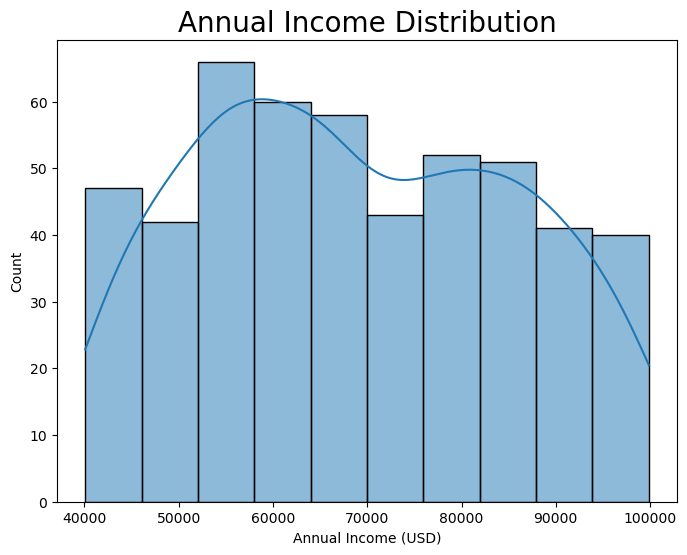

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AnnualIncome (USD)', kde=True)
plt.title('Annual Income Distribution', fontsize=20)
plt.xlabel('Annual Income (USD)')
plt.show()

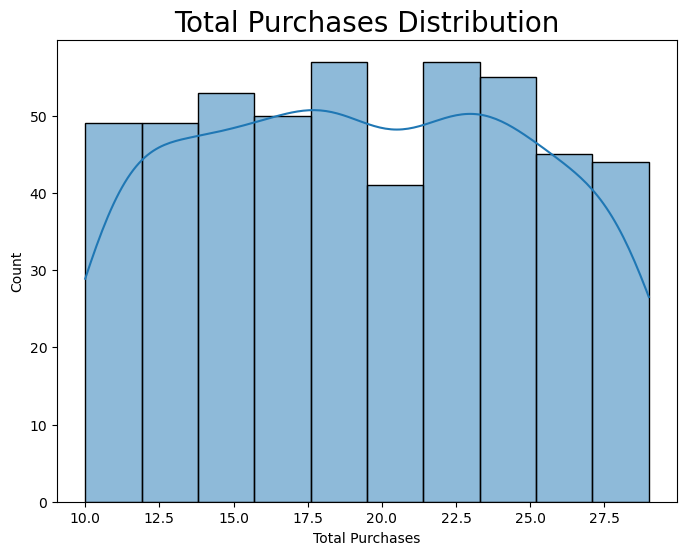

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalPurchases', kde=True)
plt.title('Total Purchases Distribution', fontsize=20)
plt.xlabel('Total Purchases')
plt.show()



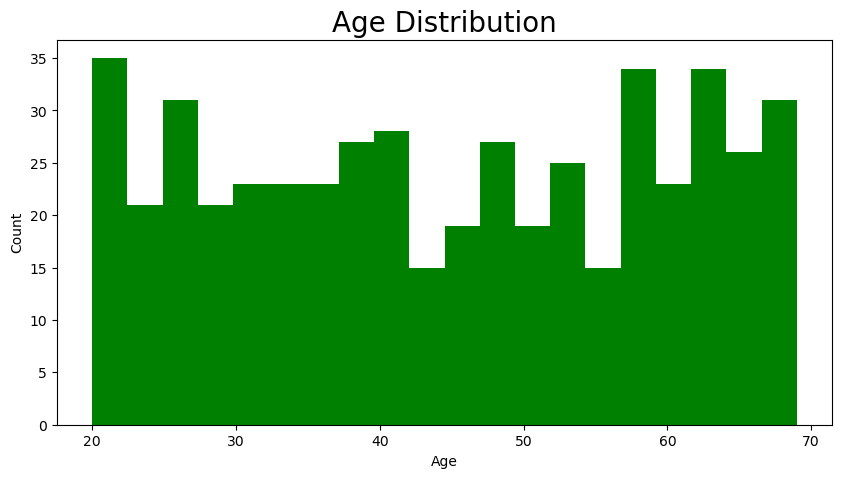

In [21]:
# plot age distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution', fontsize=20)
plt.show()

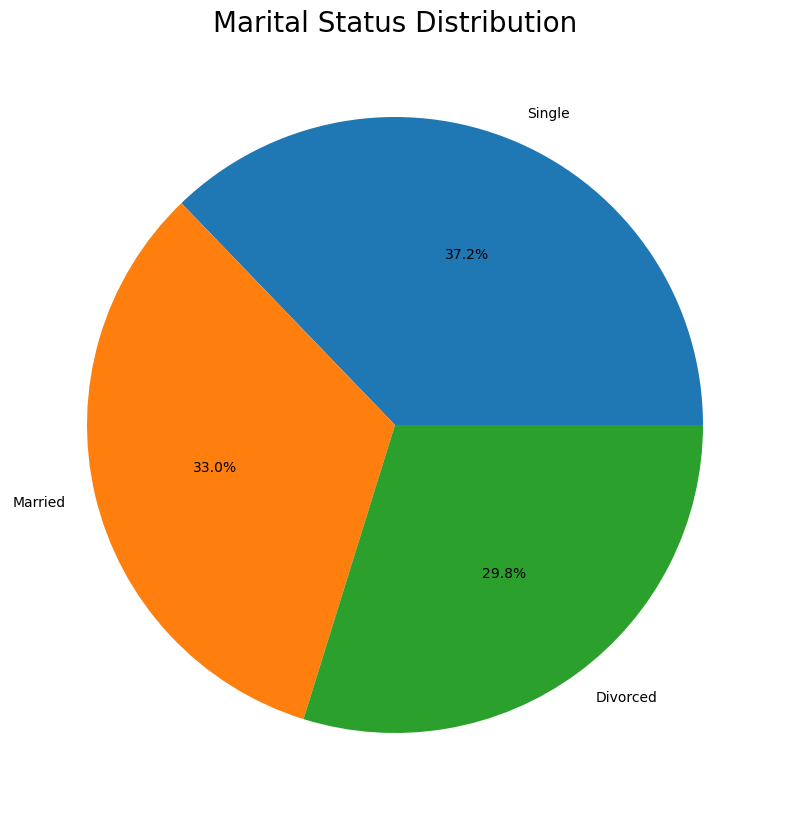

In [22]:
#plot pie chart for marital status
plt.figure(figsize=(10,10))
plt.pie(df['MaritalStatus'].value_counts(),labels=df['MaritalStatus'].value_counts().index,autopct='%1.1f%%')
plt.title('Marital Status Distribution', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Preferred Category Distribution')

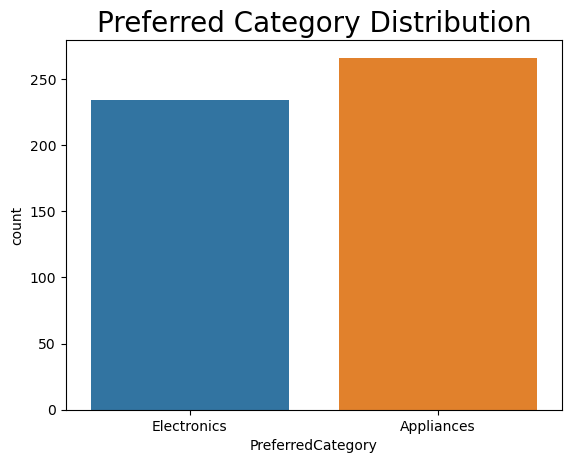

In [23]:
# plot countplot for PreferredCategory
sns.countplot(x='PreferredCategory', data=df)
plt.title("Preferred Category Distribution", fontsize=20)

Customer's seems to be purchasing more **Appliances** than Electronics.

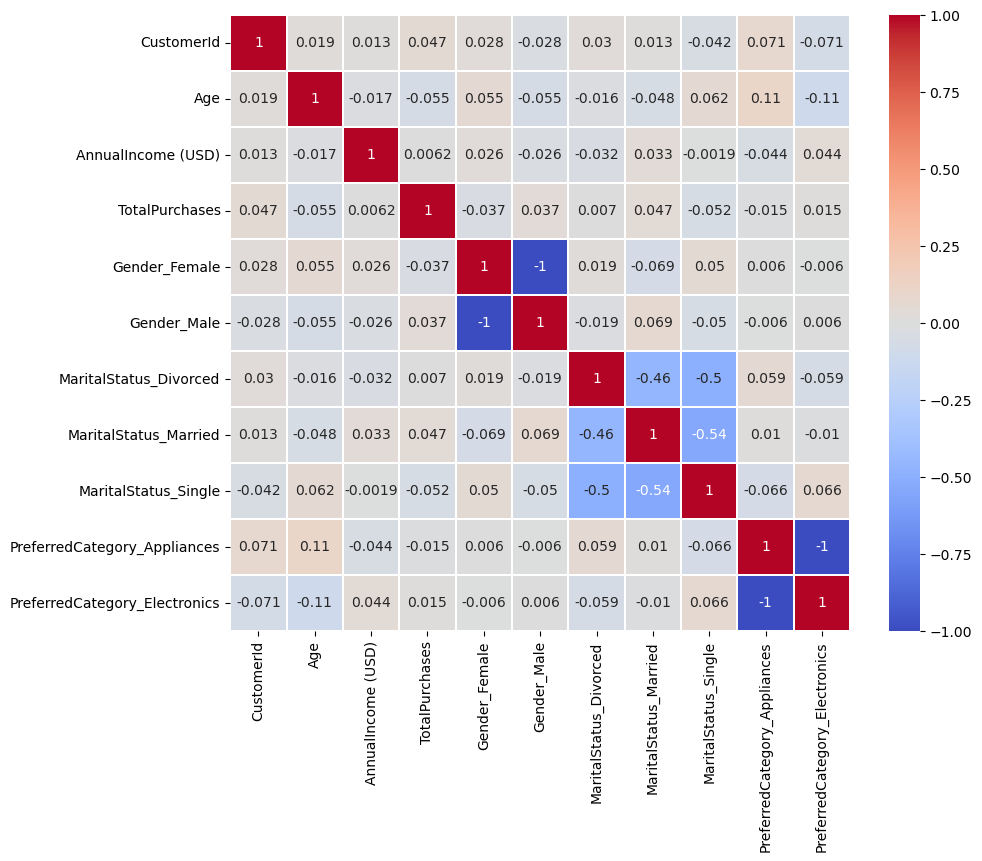

In [24]:
# plot heatmap for correlation matrix
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

There seems to be no strong correlation between attributes.

Text(0, 0.5, 'Annual Income (USD)')

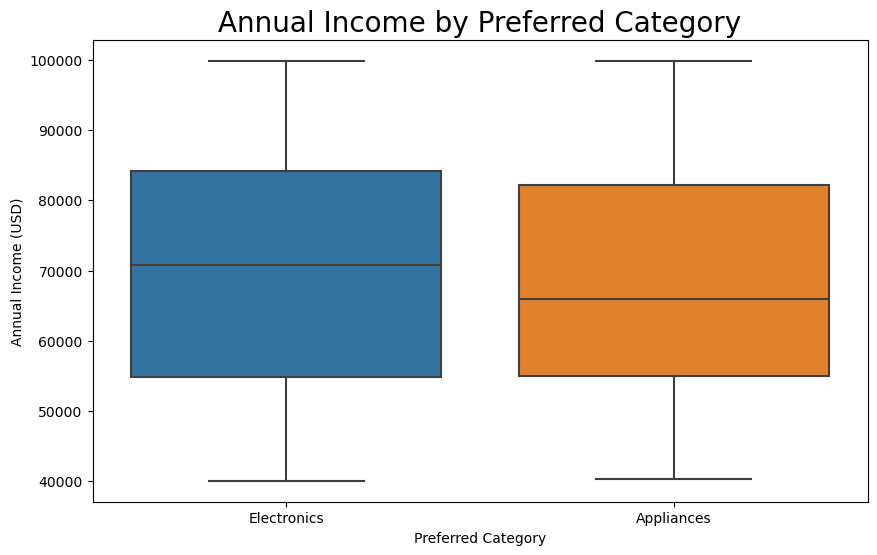

In [29]:
# plot boxplot for AnnualIncome (USD) and PreferredCategory

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PreferredCategory', y='AnnualIncome (USD)')
plt.title('Annual Income by Preferred Category', fontsize=20)
plt.xlabel('Preferred Category')
plt.ylabel('Annual Income (USD)')

Annual Income of people buying **Electronics** seems to be higher.

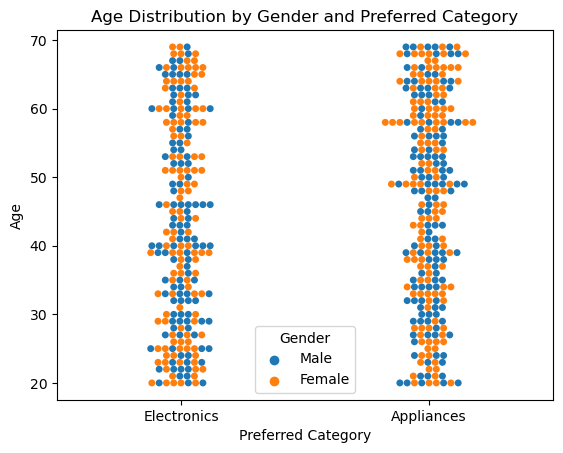

In [32]:
# Plot seaborn swarm plot 
ax = sns.swarmplot(x="PreferredCategory", y="Age", hue="Gender", data=df)

# Set title and labels
ax.set_title('Age Distribution by Gender and Preferred Category')  
ax.set_xlabel('Preferred Category')
ax.set_ylabel('Age')

# Show plot
plt.show()

Seems like more people buy Appliances frequently. Electronics is mostly purchased by customers in their ages like 20 to 30 

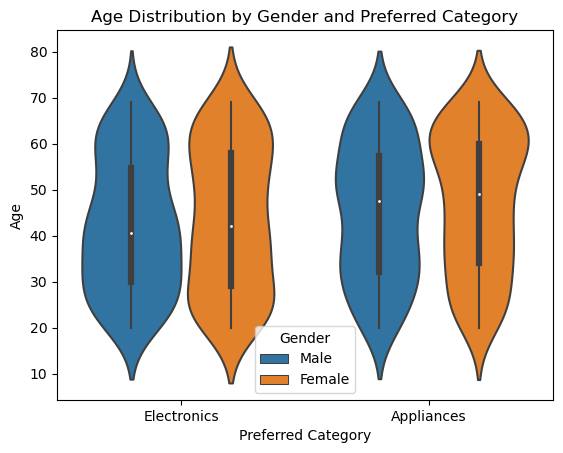

In [33]:
# Plot seaborn swarm plot 
ax = sns.violinplot(x="PreferredCategory", y="Age", hue="Gender", data=df)

# Set title and labels
ax.set_title('Age Distribution by Gender and Preferred Category')  
ax.set_xlabel('Preferred Category')
ax.set_ylabel('Age')

# Show plot
plt.show()

- Male customers purchase more Electronincs between 20 to 40.
- Female customers purchase more Appliances between 60 to 70.

c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

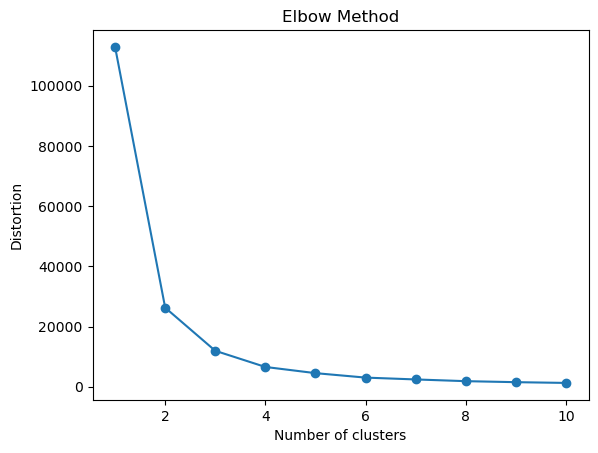

In [43]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = df_encoded[['Age','AnnualIncome (USD)', 'TotalPurchases','PreferredCategory_Appliances', 'PreferredCategory_Electronics']]
# Calculate distortions for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300,
                random_state=0)
    km.fit(features)
    distortions.append(km.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()


c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arsal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


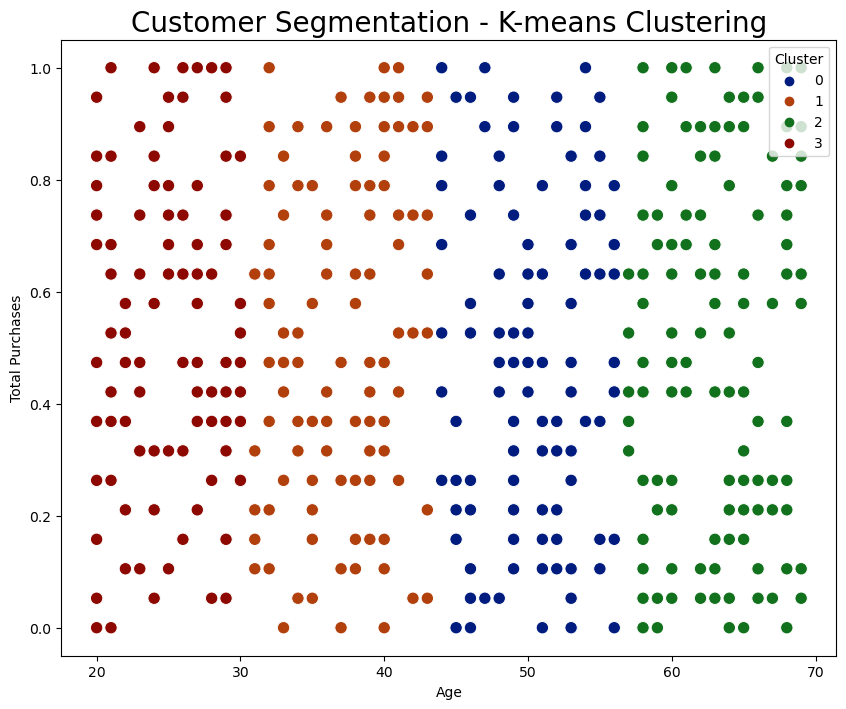

In [51]:
    # Elbow Method above shows the optimal k value to be equal to 4
    k = 4
    # Applying K-means clustering
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    df_encoded['Cluster'] = kmeans.fit_predict(features)

    # Visualising the clusters in scatterplot
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df_encoded, x='Age', y='TotalPurchases', hue='Cluster', palette='dark', s=80)
    plt.title('Customer Segmentation - K-means Clustering', fontsize=20)
    plt.xlabel('Age')
    plt.ylabel('Total Purchases')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


In [53]:
df_encoded.to_csv("customer_data.csv", index=False)